In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib
%matplotlib inline

# Gathering

Sources:

* CSV
* programmatic download from website
* Twitter API's JSON data

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2312  666776908487630848                    NaN                  NaN   
1311  707021089608753152                    NaN                  NaN   
1730  679854723806179328                    NaN                  NaN   

                      timestamp  \
2312  2015-11-18 00:36:17 +0000   
1311  2016-03-08 01:52:18 +0000   
1730  2015-12-24 02:42:51 +0000   

                                                 source  \
2312  <a href="http://twitter.com/download/iphone" r...   
1311  <a href="http://twitter.com/download/iphone" r...   
1730  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2312  This is Josep. He is a Rye Manganese mix. Can ...                  NaN   
1311  This is Tucker. He's a Dasani Episcopalian. Go...                  NaN   
1730  This is Bruce. He's a rare pup. Covered in Fro...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2312                       NaN                        NaN   
1311                       NaN                        NaN   
1730                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2312  https://twitter.com/dog_rates/status/666776908...                 5   
1311  https://twitter.com/dog_rates/status/707021089...                12   
1730  https://twitter.com/dog_rates/status/679854723...                 7   

      rating_denominator    name doggo floofer pupper puppo  
2312                  10   Josep  None    None   None  None  
1311                  10  Tucker  None    None   None  None  
1730                  10   Bruce  None    None   None  None

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)

img_predictions_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
img_predictions_df.sample(5)

tweet_id                                          jpg_url  \
238   670434127938719744  https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg   
916   701545186879471618  https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg   
443   674638615994089473  https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg   
1065  715680795826982913  https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg   
906   700167517596164096  https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg   

      img_num                p1   p1_conf  p1_dog                        p2  \
238         1   jack-o'-lantern  0.919140   False  Chesapeake_Bay_retriever   
916         1     Border_collie  0.280893    True                  Cardigan   
443         1        Pomeranian  0.846986    True                      chow   
1065        1  golden_retriever  0.990715    True        Labrador_retriever   
906         1            beagle  0.162585    True                  Pembroke   

       p2_conf  p2_dog                  p3   p3_conf  p3_dog  
238   0.027351    True  Labrador_retriever  0.020081    True  
916   0.112550    True         toy_terrier  0.053317    True  
443   0.142014    True            keeshond  0.002605    True  
1065  0.002228    True                chow  0.001197    True  
906   0.120481    True      Siberian_husky  0.110284    True

**Hide these keys before publishing or sharing notebook.**

In [4]:
consumer_key = 'lrkEdkybtJF19dJ4gQa3DTe9b'
consumer_secret = '7PPTkn6ggS6K7ZddGlzySnQ3CMpwutdTMukvZcmIexcV2cLcje'
access_token = '3518054178-oBNGrt7ussTDPHQmOOTq4l2M8VIaTgew8QIIY39'
access_secret = '18f4mHT5U2meVyMbMVi6kZUwoHErydCom5Z7BSJF8VYL2'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret )

api = tweepy.API(auth)

I could skip over grabbing all the JSON data for each tweet and grab the `retweet_count` and `favorite_count` directly from the [status response](https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json#27901076). However, this project requires that I demonstrate how to [write JSON data to a file](http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/), then load it into a pandas dataframe.

In [5]:
tweet_ids = list(archive_df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        #print(tweet_ids.index(tweet) + 1, "/", "2354")
    except:
        print("Error for: " + str(tweet))
        #print(tweet_ids.index(tweet) + 1, "/", "2354")

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Rate limit reached. Sleeping for: 742
Rate limit reached. Sleeping for: 742


In [54]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [55]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.sample(5)

tweet_id  retweets  favorites
2221  668221241640230912       209        526
1     892177421306343426      6305      33208
296   836380477523124226      3237      15736
624   793614319594401792      3528          0
490   813127251579564032      3517      12919

Why did `favourites_count` fail? Is `favourites_count` in every tweet's data?

# Assessment

Three dataframes:
 * `tweets_df` which has retweet and favorite counts
 * `img_predictions_df` has the results of a neural network trying to identify dog breed in a tweet's picture
 * `archve_df` has the tweet's text, rating, and dog category

In [56]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id     2345 non-null object
retweets     2345 non-null int64
favorites    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [57]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [58]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [59]:
img_predictions_df.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [60]:
archive_df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [61]:
tweets_df.describe()

retweets      favorites
count   2345.000000    2345.000000
mean    3021.503625    8060.106183
std     5025.967772   12127.335459
min        0.000000       0.000000
25%      606.000000    1404.000000
50%     1408.000000    3535.000000
75%     3516.000000    9964.000000
max    77282.000000  143259.000000

In [ ]:
all_columns = pd.Series(list(tweets_df) + list(archive_df) + list(img_predictions_df))
all_columns[all_columns.duplicated()]

In [15]:
archive_df.name.value_counts().head(5)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Name: name, dtype: int64

In [16]:
archive_df[archive_df.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [17]:
archive_df[archive_df.rating_numerator == 1776]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
979  749981277374128128                    NaN                  NaN   

                     timestamp  \
979  2016-07-04 15:00:45 +0000   

                                                source  \
979  <a href="https://about.twitter.com/products/tw...   

                                                  text  retweeted_status_id  \
979  This is Atticus. He's quite simply America af....                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
979                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
979  https://twitter.com/dog_rates/status/749981277...              1776   

     rating_denominator     name doggo floofer pupper puppo  
979                  10  Atticus  None    None   None  None

## Issues

Completeness

* missing retweet and favorite data for 5 tweets (`tweets_df`)
* missing img predictions for some tweets (`img_predictions_df`)

The missing retweet and favorite data is unrecoverable. There is no status data available from the Twitter API and not all tweets have an image. I did not confirm that all tweets with an image stored the image.

Tidiness

* `retweets` and `favorites` in their own table (`tweets_df`)
* dog stages in multiple columns (`archive_df`)
* three separate tables

Validity

_archive_
* `tweet_id` is int
* `timestamp` is str
* `in_reply_to_status_id` is float
* `in_reply_to_user_id` is float
* `retweeted_status_id` is float
* `retweeted_status_user_id` is float
* `retweeted_status_timestamp` is str
* dog stages are str
* `text` is cut off with ellipses
* incorrect dog names (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such)

_img predictions_
* `tweet_id` is int in `img_predictions_df` 

_tweets_
* retweets and favorites are float


I am not retrieving the rest of the tweet text at this time.

Accuracy

* None

Consistency

* meaningful but inconsistent numerators and denominators (`archive_df`)


# Cleaning

### Tidiness

**Define:** `retweets` and `favorites` in their own table (`tweets_df`)

**Code:** Convert `tweet_id` in `archive_df` to string. Inner join `tweets_df`, `archive_df`, and `img_predictions` on tweet_id.

In [62]:
archive_clean = archive_df.copy()
tweets_clean = tweets_df.copy()
img_pred_clean = img_predictions_df.copy()

In [63]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [64]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)
archive_clean = pd.merge(archive_clean, tweets_clean,
                        how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, img_pred_clean,
                        how = 'inner', on = 'tweet_id')

**Test**

In [65]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 30 columns):
tweet_id                      2069 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
doggo                         2069 non-null object
floofer                       2069 non-null object
pupper                        2069 non-null object
puppo                         2069 non-null object
retweets                      2069

In [66]:
archive_clean.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2015  667012601033924608                    NaN                  NaN   
938   728035342121635841                    NaN                  NaN   
1028  712092745624633345                    NaN                  NaN   

                      timestamp  \
2015  2015-11-18 16:12:51 +0000   
938   2016-05-05 01:35:26 +0000   
1028  2016-03-22 01:45:15 +0000   

                                                 source  \
2015  <a href="http://twitter.com/download/iphone" r...   
938   <a href="http://twitter.com/download/iphone" r...   
1028  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2015  This is Klevin. He laughs a lot. Very cool dog...                  NaN   
938   This is all I want in my life. 12/10 for super...                  NaN   
1028  This is Steven. He's inverted af. Also very he...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2015                       NaN                        NaN   
938                        NaN                        NaN   
1028                       NaN                        NaN   

                                          expanded_urls  ...    img_num  \
2015  https://twitter.com/dog_rates/status/667012601...  ...          1   
938   https://twitter.com/dog_rates/status/728035342...  ...          1   
1028  https://twitter.com/dog_rates/status/712092745...  ...          1   

                p1   p1_conf p1_dog                   p2   p2_conf p2_dog  \
2015         hyena  0.987230  False  African_hunting_dog  0.012601  False   
938   handkerchief  0.302961  False           Pomeranian  0.248664   True   
1028   triceratops  0.235373  False                llama  0.153126  False   

                    p3   p3_conf p3_dog  
2015            coyote  0.000057  False  
938           Shih-Tzu  0.111015   True  
1028  three-toed_sloth  0.111840  False  

[3 rows x 30 columns]

In [67]:
archive_clean[archive_clean.retweets.isnull()]
#sum(archive_clean.retweets.isnull())

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, retweets, favorites, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 30 columns]

**Define:** dog categories hide category variable (`archive_df`)

**Code:** Melt dog stage columns into single column.

In [68]:
archive_clean = pd.melt(archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                 'timestamp', 'source', 'text', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                 'name', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
                                 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                                 'p3_dog'],
                        value_name='dog_stage')
archive_clean = archive_clean.drop('variable', axis=1)

**Test**

In [69]:
archive_clean.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2717  771770456517009408                    NaN                  NaN   
3327  692187005137076224                    NaN                  NaN   
3658  675349384339542016           6.749998e+17         4.196984e+09   

                      timestamp  \
2717  2016-09-02 18:03:10 +0000   
3327  2016-01-27 03:26:56 +0000   
3658  2015-12-11 16:20:15 +0000   

                                                 source  \
2717  <a href="http://twitter.com/download/iphone" r...   
3327  <a href="http://twitter.com/download/iphone" r...   
3658  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2717  This is Davey. He'll have your daughter home b...                  NaN   
3327  This is a rare Arctic Wubberfloof. Unamused by...                  NaN   
3658  Yea I lied. Here's more. All 13/10 https://t.c...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2717                       NaN                        NaN   
3327                       NaN                        NaN   
3658                       NaN                        NaN   

                                          expanded_urls    ...      \
2717  https://twitter.com/dog_rates/status/771770456...    ...       
3327  https://twitter.com/dog_rates/status/692187005...    ...       
3658  https://twitter.com/dog_rates/status/675349384...    ...       

                  p1   p1_conf p1_dog        p2   p2_conf p2_dog  \
2717        papillon  0.533180   True    collie  0.192031   True   
3327  Siberian_husky  0.810592   True  malamute  0.119745   True   
3658          borzoi  0.866367   True    Saluki  0.122079   True   

                   p3   p3_conf  p3_dog  dog_stage  
2717    Border_collie  0.121626    True       None  
3327       Eskimo_dog  0.029265    True       None  
3658  Irish_wolfhound  0.004020    True       None  

[3 rows x 27 columns]

In [70]:
len(archive_clean[archive_clean.dog_stage != 'None'])

334

In [71]:
archive_clean.dog_stage.value_counts()

None       7942
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [72]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 27 columns):
tweet_id                      8276 non-null object
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8276 non-null object
source                        8276 non-null object
text                          8276 non-null object
retweeted_status_id           300 non-null float64
retweeted_status_user_id      300 non-null float64
retweeted_status_timestamp    300 non-null object
expanded_urls                 8276 non-null object
rating_numerator              8276 non-null int64
rating_denominator            8276 non-null int64
name                          8276 non-null object
retweets                      8276 non-null int64
favorites                     8276 non-null int64
jpg_url                       8276 non-null object
img_num                       8276 non-null int64
p1                            8276

In [73]:
# Keep one of 3 duplicates with 'None'
dup_df1 = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_df1 = archive_clean.drop_duplicates()

# Keep rows with dog stage
dup_pos = archive_clean.duplicated(subset='tweet_id', keep = False)
dup_df2 = archive_clean[dup_pos]
dup_df2 = dup_df2[dup_df2.dog_stage != 'None']

# Combine
dup_df1 = dup_df1.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_df2)

In [74]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 7092
Data columns (total 27 columns):
tweet_id                      2082 non-null object
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2082 non-null object
source                        2082 non-null object
text                          2082 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2082 non-null object
rating_numerator              2082 non-null int64
rating_denominator            2082 non-null int64
name                          2082 non-null object
retweets                      2082 non-null int64
favorites                     2082 non-null int64
jpg_url                       2082 non-null object
img_num                       2082 non-null int64
p1                            2082 no

In [75]:
remaining_dup_df = dup_df_merged[dup_df_merged.duplicated(subset='tweet_id', keep=False)]
remaining_dup_df[remaining_dup_df.tweet_id == '817777686764523521']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
362   817777686764523521                    NaN                  NaN   
4500  817777686764523521                    NaN                  NaN   

                      timestamp  \
362   2017-01-07 16:59:28 +0000   
4500  2017-01-07 16:59:28 +0000   

                                                 source  \
362   <a href="http://twitter.com/download/iphone" r...   
4500  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
362   This is Dido. She's playing the lead role in "...                  NaN   
4500  This is Dido. She's playing the lead role in "...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
362                        NaN                        NaN   
4500                       NaN                        NaN   

                                          expanded_urls    ...      \
362   https://twitter.com/dog_rates/status/817777686...    ...       
4500  https://twitter.com/dog_rates/status/817777686...    ...       

                          p1   p1_conf p1_dog                     p2  \
362   curly-coated_retriever  0.733256   True  flat-coated_retriever   
4500  curly-coated_retriever  0.733256   True  flat-coated_retriever   

       p2_conf p2_dog                   p3   p3_conf  p3_dog  dog_stage  
362   0.214145   True  Irish_water_spaniel  0.029769    True      doggo  
4500  0.214145   True  Irish_water_spaniel  0.029769    True     pupper  

[2 rows x 27 columns]

**Define:** Duplicate tweets from multiple dog stages.

**Code:** Multiple stages appear in 14 tweets. Change `dog_stage` to _multiple_, drop duplicates. Remove drop duplicates from `archive_clean` based on `tweet_id`, then append `multiple` rows.

In [76]:
remaining_dup_df.dog_stage = 'multiple'
dup_drops = remaining_dup_df.drop_duplicates()
dup_drops[dup_drops.tweet_id == '817777686764523521']

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
362  817777686764523521                    NaN                  NaN   

                     timestamp  \
362  2017-01-07 16:59:28 +0000   

                                                source  \
362  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
362  This is Dido. She's playing the lead role in "...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
362                       NaN                        NaN   

                                         expanded_urls    ...      \
362  https://twitter.com/dog_rates/status/817777686...    ...       

                         p1   p1_conf p1_dog                     p2   p2_conf  \
362  curly-coated_retriever  0.733256   True  flat-coated_retriever  0.214145   

    p2_dog                   p3   p3_conf  p3_dog  dog_stage  
362   True  Irish_water_spaniel  0.029769    True   multiple  

[1 rows x 27 columns]

In [77]:
duped_ids = set(remaining_dup_df.tweet_id)
for idx in dup_df_merged.tweet_id:
    if idx in duped_ids:
        dup_df_merged.dog_stage[dup_df_merged.tweet_id == idx] = 'multiple'
archive_clean = dup_df_merged.drop_duplicates()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Test**

In [78]:
archive_clean.dog_stage.value_counts()

None        1748
pupper       211
doggo         67
puppo         23
multiple      13
floofer        7
Name: dog_stage, dtype: int64

In [79]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 7092
Data columns (total 27 columns):
tweet_id                      2069 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
retweets                      2069 non-null int64
favorites                     2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 non-null int64
p1                            2069 no

### Validity

**Define:** Convert float variables (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`) to object.

**Code:** Convert tweet_id to string

In [80]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [81]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 7092
Data columns (total 27 columns):
tweet_id                      2069 non-null object
in_reply_to_status_id         2069 non-null object
in_reply_to_user_id           2069 non-null object
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           2069 non-null object
retweeted_status_user_id      2069 non-null object
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
retweets                      2069 non-null int64
favorites                     2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 non-null int64
p1                            206

**Define:** Convert object variables (`timestamp` and `retweeted_status_timestamp`) to datetime.

**Code:** Convert timestamp to datetime object.

In [82]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [83]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 7092
Data columns (total 27 columns):
tweet_id                      2069 non-null object
in_reply_to_status_id         2069 non-null object
in_reply_to_user_id           2069 non-null object
timestamp                     2069 non-null datetime64[ns]
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           2069 non-null object
retweeted_status_user_id      2069 non-null object
retweeted_status_timestamp    75 non-null datetime64[ns]
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
retweets                      2069 non-null int64
favorites                     2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 non-null int64
p1               

In [84]:
archive_clean.sample(1)

tweet_id in_reply_to_status_id in_reply_to_user_id  \
5858  672481316919734272                   nan                 nan   

               timestamp                                             source  \
5858 2015-12-03 18:23:34  <a href="http://twitter.com/download/iphone" r...   

                                                   text retweeted_status_id  \
5858  Say hello to Jazz. She should be on the cover ...                 nan   

     retweeted_status_user_id retweeted_status_timestamp  \
5858                      nan                        NaT   

                                          expanded_urls    ...      \
5858  https://twitter.com/dog_rates/status/672481316...    ...       

                 p1   p1_conf p1_dog      p2   p2_conf p2_dog  \
5858  Border_collie  0.599454   True  collie  0.106227   True   

                     p3   p3_conf  p3_dog  dog_stage  
5858  Shetland_sheepdog  0.094465    True     pupper  

[1 rows x 27 columns]

**Define:** dog categories are str (`archive_df`)

**Code:** convert `dog_stage` to categorical type

In [85]:
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [86]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 7092
Data columns (total 27 columns):
tweet_id                      2069 non-null object
in_reply_to_status_id         2069 non-null object
in_reply_to_user_id           2069 non-null object
timestamp                     2069 non-null datetime64[ns]
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           2069 non-null object
retweeted_status_user_id      2069 non-null object
retweeted_status_timestamp    75 non-null datetime64[ns]
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
retweets                      2069 non-null int64
favorites                     2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 non-null int64
p1               

**Define:** retweets and favorites are float

**Code:** Fill NaNs with median values.

In [87]:
median_retweet = np.median(archive_clean.retweets.dropna())
median_favorite = np.median(archive_clean.favorites.dropna())
print(median_retweet, median_favorite)

1358.0 3781.0


In [88]:
archive_clean.retweets = archive_clean.retweets.fillna(median_retweet).astype('int64')
archive_clean.favorites = archive_clean.favorites.fillna(median_favorite).astype('int64')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [89]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 7092
Data columns (total 27 columns):
tweet_id                      2069 non-null object
in_reply_to_status_id         2069 non-null object
in_reply_to_user_id           2069 non-null object
timestamp                     2069 non-null datetime64[ns]
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           2069 non-null object
retweeted_status_user_id      2069 non-null object
retweeted_status_timestamp    75 non-null datetime64[ns]
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
retweets                      2069 non-null int64
favorites                     2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 non-null int64
p1               

**Define:** names incorrectly identified from available text

**Code:** replace words with names where available

In [90]:
archive_clean.text[archive_clean.name =='a']
archive_clean.text[archive_clean.name =='an']
archive_clean.text[archive_clean.name =='my']
archive_clean.text[archive_clean.name =='his']

810    That is Quizno. This is his beach. He does not...
Name: text, dtype: object

In [91]:
archive_clean.name[2204] = 'Berta'
archive_clean.name[2034] = 'Jacob'
archive_clean.name[2066] = 'Rufus'
archive_clean.name[2116] = 'Spork'
archive_clean.name[2125] = 'Cherokee'
archive_clean.name[2161] = 'Alfredo'
archive_clean.name[2218] = 'Chuk'
archive_clean.name[2235] = 'Alfonso'
archive_clean.name[2249] = 'Cheryl'
archive_clean.name[2255] = 'Jessiga'
archive_clean.name[2264] = 'Klint'
archive_clean.name[2273] = 'Kohl'
archive_clean.name[2304] = 'Pepe'
archive_clean.name[2311] = 'Octaviath'
archive_clean.name[archive_clean.name == 'my'] = 'Zoey'
archive_clean.name[archive_clean.name == 'his'] = 'Quizno'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:747: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6

**Test**

In [92]:
archive_clean.loc[archive_clean.name == 'Berta']
archive_clean.loc[archive_clean.name == 'Jacob']
archive_clean.loc[archive_clean.name == 'Rufus']
archive_clean.loc[archive_clean.name == 'Spork']
archive_clean.loc[archive_clean.name == 'Cherokee']
archive_clean.loc[archive_clean.name == 'Alfredo']
archive_clean.loc[archive_clean.name == 'Chuk']
archive_clean.loc[archive_clean.name == 'Alfonso']
archive_clean.loc[archive_clean.name == 'Cheryl']
archive_clean.loc[archive_clean.name == 'Jessiga']
archive_clean.loc[archive_clean.name == 'Klint']
archive_clean.loc[archive_clean.name == 'Kohl']
archive_clean.loc[archive_clean.name == 'Pepe']
archive_clean.loc[archive_clean.name == 'Octaviath']
archive_clean.loc[archive_clean.name == 'Zoey']
archive_clean.loc[archive_clean.name == 'Quizno']

tweet_id in_reply_to_status_id in_reply_to_user_id  \
810  748692773788876800                   nan                 nan   

              timestamp                                             source  \
810 2016-07-01 01:40:41  <a href="http://twitter.com/download/iphone" r...   

                                                  text retweeted_status_id  \
810  That is Quizno. This is his beach. He does not...                 nan   

    retweeted_status_user_id retweeted_status_timestamp  \
810                      nan                        NaT   

                                         expanded_urls    ...      p1  \
810  https://twitter.com/dog_rates/status/748692773...    ...      ox   

      p1_conf p1_dog    p2   p2_conf p2_dog      p3   p3_conf  p3_dog  \
810  0.337871  False  plow  0.269287  False  oxcart  0.245653   False   

     dog_stage  
810      doggo  

[1 rows x 27 columns]

I noticed that the text for each tweet is incomplete. I am not correcting this at this time.

**Define:** incorrect dog names (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such) (`archive_df`)

**Code:** Replace "a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such" with "None".

In [93]:
non_names = ['a', 'an', 'the', 'just', 'one', 'very', 'quite', 'not', 'actually', 
             'mad', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly', 'by', 'his', 'such']

for name in archive_clean.name:
    if name in non_names:
        archive_clean.name[archive_clean.name == name] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


**Test**

In [94]:
archive_clean.name.value_counts()[:10]

None       667
Charlie     11
Oliver      10
Tucker      10
Cooper      10
Lucy        10
Penny       10
Lola         8
Sadie        8
Bo           8
Name: name, dtype: int64

**Define:** meaningful but inconsistent numerators and denominators (`archive_df`)

In [95]:
archive_clean.rating_denominator.value_counts()

10     2051
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

While these numerators and denominators have strange values, the reason for that is for humor. These are intentional, not errors. I will leave them as they are.

# Store

In [96]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analysis

What does the relationship between retweets and favorites look like? 5 tweets had missing values for retweets and favorites, so I filled those in with median values for their respective variables.

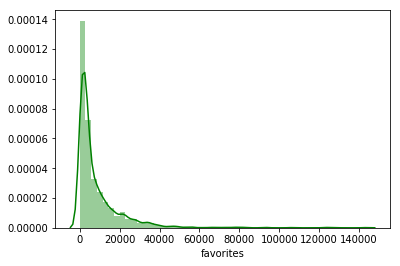

In [106]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(archive_clean.favorites, color = 'green', label = 'Favorites')

plt.show()

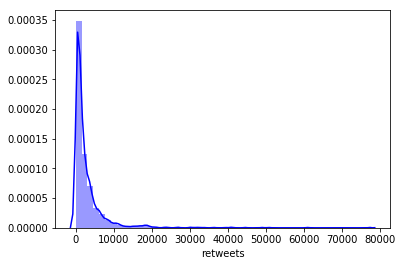

In [107]:
sns.distplot(archive_clean.retweets, color = 'blue', label = 'Retweets')

plt.show()

Trying to log transform the favorites and retweets variables so I can get a normal distribution. I'm adding some artificial jitter by setting the zero values to ones.

In [100]:
favorities_lognormed = archive_clean.favorites[archive_clean.favorites <= 0] = 1
retweets_lognormed = archive_clean.retweets[archive_clean.retweets <= 0] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/li

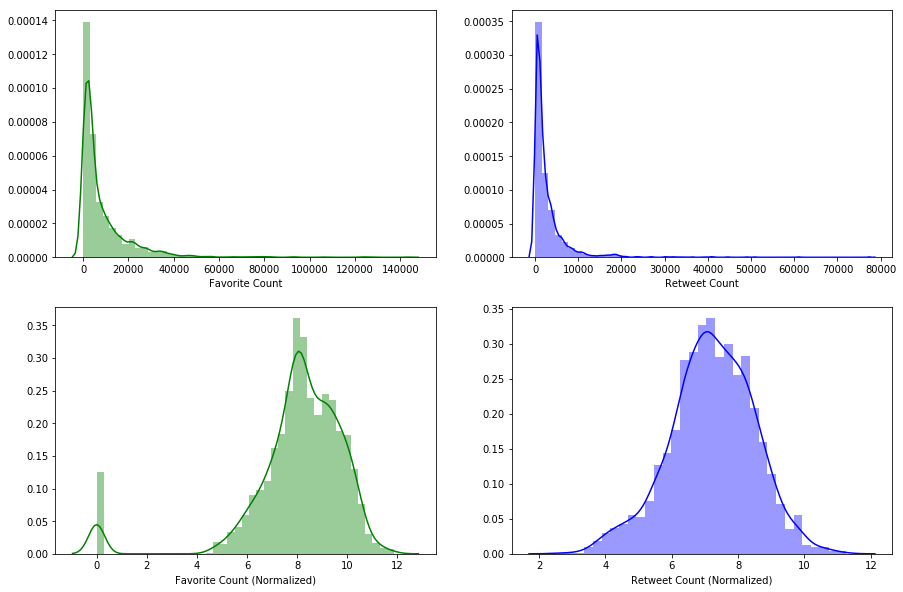

In [108]:
f, axes = plt.subplots(2,2,figsize=(15,10),sharex=False)

sns.distplot(archive_clean.favorites, color = 'green', ax=axes[0,0], axlabel='Favorite Count')
sns.distplot(archive_clean.retweets, color = 'blue', ax=axes[0,1], axlabel='Retweet Count')
sns.distplot(archive_clean.favorites.apply(np.log), color = 'green', ax=axes[1,0], axlabel='Favorite Count (Normalized)')
sns.distplot(archive_clean.retweets.apply(np.log), color = 'blue', ax=axes[1,1], axlabel='Retweet Count (Normalized)')

plt.show()
f.savefig('distplots.png')

The original distributions for both favorites and retweets have long positive tails. _Extremely popular tweets are extremely rare._ The normalized graphs (the bottom two) again show similar distributions. They are roughly normal except for the spike in values for the normalized favorite count. That may be due to my jitter work and not an actual attribute of the data. Or there are actually a bunch of tweets with one favorite count.

The two variables seem to have similar distributions implying that the _two measurements are representing similar phenomona_. 

In [102]:
archive_clean.retweets.describe()

count     2069.000000
mean      2868.302562
std       4848.652842
min         13.000000
25%        612.000000
50%       1358.000000
75%       3336.000000
max      77282.000000
Name: retweets, dtype: float64

In [103]:
archive_clean.favorites.describe()

count      2069.000000
mean       8521.793137
std       12435.610968
min           1.000000
25%        1636.000000
50%        3781.000000
75%       10745.000000
max      143259.000000
Name: favorites, dtype: float64

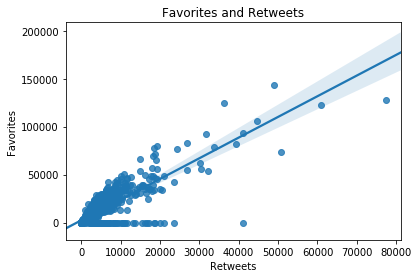

In [109]:
g = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()
fig.savefig('scatterplot.png')

In [105]:
archive_clean.corr()

rating_numerator  rating_denominator  retweets  favorites  \
rating_numerator            1.000000            0.198248  0.017855   0.016634   
rating_denominator          0.198248            1.000000 -0.022051  -0.025899   
retweets                    0.017855           -0.022051  1.000000   0.840632   
favorites                   0.016634           -0.025899  0.840632   1.000000   
img_num                    -0.000395           -0.004057  0.108601   0.132084   
p1_conf                    -0.009083           -0.004440  0.049792   0.070799   
p1_dog                     -0.028480            0.000906  0.006133   0.047389   
p2_conf                    -0.020316           -0.034425 -0.010264  -0.022184   
p2_dog                     -0.033738           -0.000518  0.019525   0.057245   
p3_conf                    -0.003932            0.006883 -0.035907  -0.050058   
p3_dog                     -0.028468            0.005010 -0.000200   0.038788   

                     img_num   p1_conf    p1_dog   p2_conf    p2_dog  \
rating_numerator   -0.000395 -0.009083 -0.028480 -0.020316 -0.033738   
rating_denominator -0.004057 -0.004440  0.000906 -0.034425 -0.000518   
retweets            0.108601  0.049792  0.006133 -0.010264  0.019525   
favorites           0.132084  0.070799  0.047389 -0.022184  0.057245   
img_num             1.000000  0.203628  0.027182 -0.160238  0.047210   
p1_conf             0.203628  1.000000  0.116387 -0.511751  0.131284   
p1_dog              0.027182  0.116387  1.000000  0.113607  0.634984   
p2_conf            -0.160238 -0.511751  0.113607  1.000000  0.102257   
p2_dog              0.047210  0.131284  0.634984  0.102257  1.000000   
p3_conf            -0.139022 -0.709519  0.050522  0.479403  0.044219   
p3_dog              0.059163  0.107553  0.555973  0.067885  0.551817   

                     p3_conf    p3_dog  
rating_numerator   -0.003932 -0.028468  
rating_denominator  0.006883  0.005010  
retweets           -0.035907 -0.000200  
favorites          -0.050058  0.038788  
img_num            -0.139022  0.059163  
p1_conf            -0.709519  0.107553  
p1_dog              0.050522  0.555973  
p2_conf             0.479403  0.067885  
p2_dog              0.044219  0.551817  
p3_conf             1.000000  0.043664  
p3_dog              0.043664  1.000000

There is a strong relationship between retweet and favorite counts (0.72). _As a tweet gains Favorites, one can expect to see Retweets to increase and vice versa_. It looks like it may be a nonlinear relationship.

I am curious about the tweets that have many retweets but zero favorites. I wonder if this may be due to added or subtracted features over time. I noticed that my Twitter doesn't have a "Favorite" button any more. It is now called Like. I have not looked to see whether the Favorite data was removed from the JSON data and replaced with Likes.